In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [9]:
df_gxe = pd.read_csv('GXE_correlation.csv')
len(df_gxe)

803069

In [3]:
# Remove rows where env_feature is either Year_Normalized or Env_label_Normalised
df_filtered = df_gxe[~df_gxe["env_feature"].isin(["Year_Normalized", "Env_Label_Normalized", "Hybrid_Label_Normalized"])]

In [8]:
# Option 1: boolean indexing (most common)
df_filtered = df_filtered[df_filtered['p_value'] <= 0.05]
df_filtered.head()
len(df_filtered)

713405

In [10]:
high_gxe = df_filtered.groupby('snp')['abs_corr'].mean().sort_values(ascending=False)

In [11]:
high_gxe_snps = high_gxe.head(10).index.to_list()
high_gxe_snps

['S9_146075109',
 'S6_161843360',
 'S1_268826064',
 'S1_26638329',
 'S8_13771167',
 'S2_8737432',
 'S2_193261776',
 'S5_199120264',
 'S9_25652799',
 'S1_50923878']

In [12]:
df_filtered_2 = df_filtered[df_filtered['snp'].isin(high_gxe_snps)]

In [13]:
df_filtered_2['snp'].value_counts()

snp
S2_8737432      368
S1_268826064    362
S1_26638329     361
S9_25652799     361
S6_161843360    360
S8_13771167     360
S1_50923878     359
S2_193261776    357
S9_146075109    354
S5_199120264    354
Name: count, dtype: int64

In [14]:
high_env_gxe = df_filtered_2.groupby('env_feature')['abs_corr'].mean().sort_values(ascending=False)
high_env_gxe

env_feature
T2M_MIN - Week 12              0.306224
T2M_GDD - Week 12              0.298161
T2M_MAX - Week 18              0.291916
T2M_GDD - Week 13              0.285042
T2M_MIN - Week 18              0.284360
                                 ...   
PRECTOTCORR - Week 30          0.010835
ALLSKY_SFC_SW_DWN - Week 30    0.010835
T2M_DIFF_SUM - Week 30         0.010835
T2M_MIN - Week 30              0.010835
T2M_GDD - Week 30              0.010835
Name: abs_corr, Length: 370, dtype: float64

In [28]:
high_gxe_envs = high_env_gxe.head(10).index.to_list()
high_gxe_envs

['T2M_MIN - Week 12',
 'T2M_GDD - Week 12',
 'T2M_MAX - Week 18',
 'T2M_GDD - Week 13',
 'T2M_MIN - Week 18',
 'T2M_MIN - Week 13',
 'T2M_GDD - Week 17',
 'T2M_GDD - Week 18',
 'T2M_MIN - Week 17',
 'T2M_MAX - Week 17']

In [29]:
df_filtered_3 = df_filtered_2[df_filtered_2['env_feature'].isin(high_gxe_envs)]

In [30]:
df_filtered_3['env_feature'].value_counts()

env_feature
T2M_MIN - Week 12    10
T2M_MIN - Week 13    10
T2M_GDD - Week 13    10
T2M_GDD - Week 12    10
T2M_MIN - Week 18    10
T2M_MAX - Week 18    10
T2M_GDD - Week 17    10
T2M_GDD - Week 18    10
T2M_MIN - Week 17    10
T2M_MAX - Week 17    10
Name: count, dtype: int64

In [31]:
df_plot = df_filtered_3.drop(columns=['abs_corr'])

In [19]:
df_plot.head()

,snp,env_feature,spearman_corr,p_value
45,S9_146075109,T2M_MIN - Week 12,-0.355370,0.0
49,S6_161843360,T2M_MIN - Week 12,-0.348937,0.0
54,S6_161843360,T2M_MIN - Week 13,-0.344740,0.0
58,S6_161843360,T2M_GDD - Week 13,-0.341373,0.0
64,S6_161843360,T2M_GDD - Week 12,-0.339136,0.0


In [32]:
df_plot_transpose = df_plot.pivot(index="snp", columns="env_feature", values="spearman_corr")

In [16]:
cols = df_plot_transpose.columns.to_list()

for col in cols:
    print(col)  # print the column name
    print(f"max gxe corr: {df_plot_transpose[col].max()}")
    print(f"min gxe corr: {df_plot_transpose[col].min()}")
    print("---------------------")
    

RH2M - Week 10
max gxe corr: 0.2227046523351942
min gxe corr: -0.1429119126573411
---------------------
RH2M - Week 15
max gxe corr: 0.1925072226427781
min gxe corr: -0.2111395605885628
---------------------
RH2M - Week 16
max gxe corr: 0.1773888571008387
min gxe corr: -0.2677032817056973
---------------------
RH2M - Week 17
max gxe corr: 0.1426948162498567
min gxe corr: -0.213873116992743
---------------------
RH2M - Week 2
max gxe corr: 0.2290256314060222
min gxe corr: -0.232374813937397
---------------------
RH2M - Week 3
max gxe corr: 0.2290130386509852
min gxe corr: -0.2230703021136048
---------------------
RH2M - Week 4
max gxe corr: 0.2170685587217831
min gxe corr: -0.2594128481205426
---------------------
RH2M - Week 5
max gxe corr: 0.2569153965909271
min gxe corr: -0.2516243140092538
---------------------
T2M_DIFF_SUM - Week 10
max gxe corr: 0.1436818285504573
min gxe corr: -0.2281526141086202
---------------------
T2M_DIFF_SUM - Week 5
max gxe corr: 0.2002282571136737
min gxe

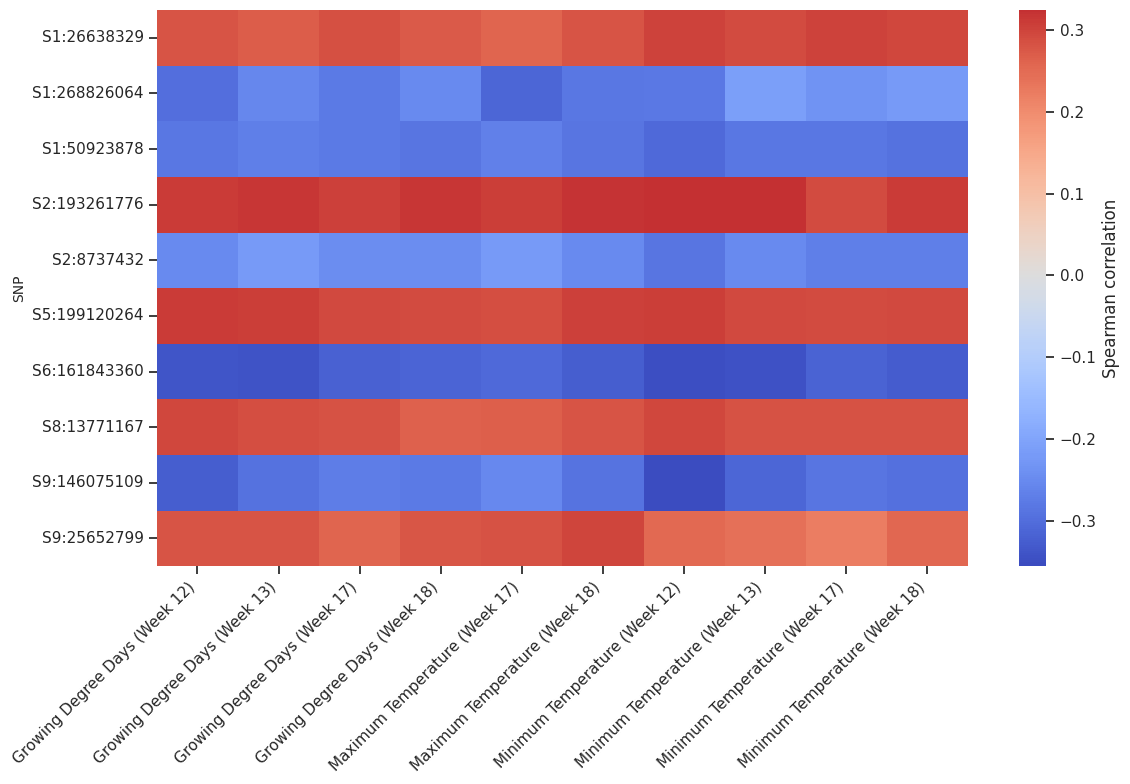

In [33]:
sns.set_theme(style='ticks')
# Your variable name mapping
var_name_map = {
    "T2MDEW": "Dew Point Temperature",
    "RH2M": "Relative Humidity",
    "WS2M": "Wind Speed",
    "ALLSKY_SFC_SW_DWN": "Solar Radiation",
    "T2M_MAX": "Maximum Temperature",
    "T2M_MIN": "Minimum Temperature",
    "PRECTOTCORR": "Precipitation",
    "T2M_GDD": "Growing Degree Days",
    "Year_Normalized": "Year",
    "Env_Label_Normalized": "Environment Label",
    "Hybrid_Label_Normalized": "Hybrid Label",
    "lat_Normalized": "Central Latitude",
    "lon_Normalized": "Central Longitude",
    "Soil_Taxonomic_ID and horizon description, if known_Label_Normalized": "Soil Taxonomy",
    "T2M_DIFF_SUM": "Differences in Daily Temperature",
}

# Function to format feature names
def format_feature_name(feature):
    if feature.startswith("S") and "_" in feature:
        chrom, pos = feature.split("_", 1)
        if chrom[1:].isdigit():
            return f"{chrom}:{pos}"
    parts = feature.split(" - ")
    var = parts[0]
    week = parts[1] if len(parts) > 1 else None
    var_readable = var_name_map.get(var, var)
    return f"{var_readable} ({week})" if week else var_readable

# Function to order env_features by variable name then week number
def order_env_features(columns):
    def sort_key(feature):
        parts = feature.split(" - ")
        var = parts[0]
        week = None
        if len(parts) > 1:
            match = re.search(r"Week\s*(-?\d+)", parts[1])
            if match:
                week = int(match.group(1))
        return (var, week if week is not None else float("inf"))
    return sorted(columns, key=sort_key)

# Pivot table: SNPs as rows, env_feature as columns
df_plot_transpose = df_plot.pivot(index="snp", columns="env_feature", values="spearman_corr")

# Format SNP labels (replace "_" with ":")
df_plot_transpose.index = df_plot_transpose.index.str.replace("_", ":")

# Order environment feature columns
df_plot_transpose = df_plot_transpose[order_env_features(df_plot_transpose.columns)]

# Format environment feature labels
df_plot_transpose.columns = [format_feature_name(col) for col in df_plot_transpose.columns]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_plot_transpose, annot=False, cmap="coolwarm", center=0, cbar_kws={'label': f'Spearman correlation'})
plt.title("", fontsize=12)
plt.xlabel("", fontsize=10)
plt.ylabel("SNP", fontsize=10)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

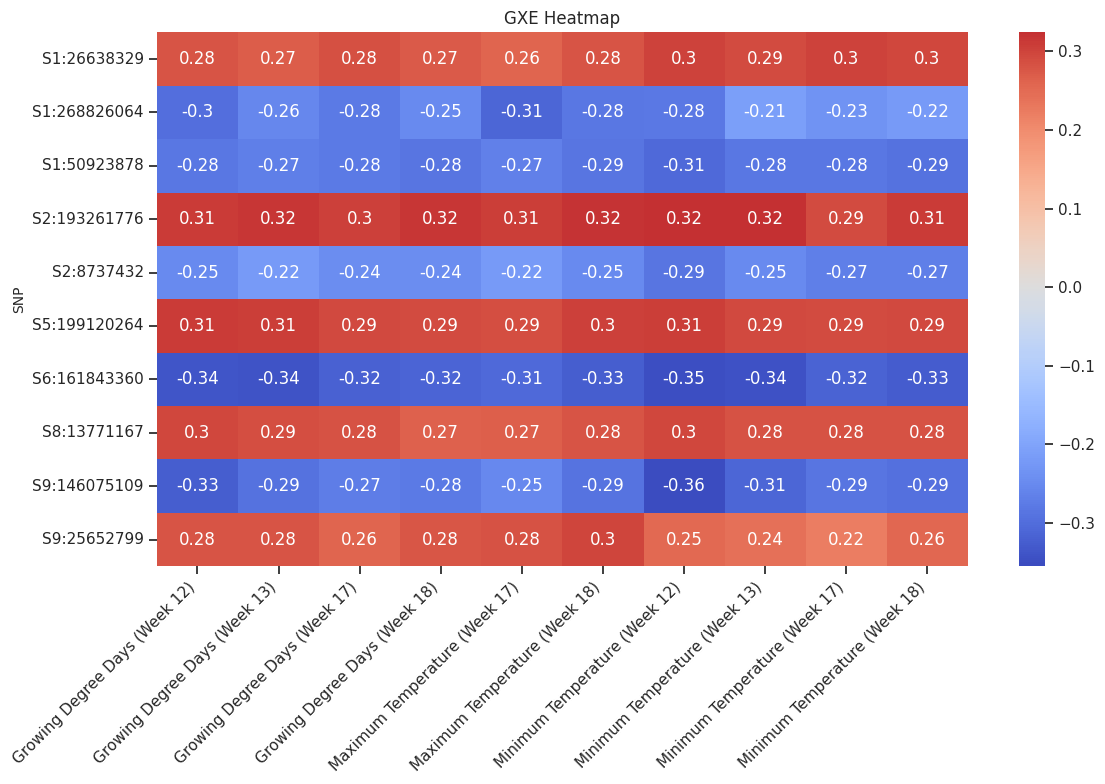

In [40]:
sns.set_theme(style='ticks')
# Your variable name mapping
var_name_map = {
    "T2MDEW": "Dew Point Temperature",
    "RH2M": "Relative Humidity",
    "WS2M": "Wind Speed",
    "ALLSKY_SFC_SW_DWN": "Solar Radiation",
    "T2M_MAX": "Maximum Temperature",
    "T2M_MIN": "Minimum Temperature",
    "PRECTOTCORR": "Precipitation",
    "T2M_GDD": "Growing Degree Days",
    "Year_Normalized": "Year",
    "Env_Label_Normalized": "Environment Label",
    "Hybrid_Label_Normalized": "Hybrid Label",
    "lat_Normalized": "Central Latitude",
    "lon_Normalized": "Central Longitude",
    "Soil_Taxonomic_ID and horizon description, if known_Label_Normalized": "Soil Taxonomy",
    "T2M_DIFF_SUM": "Differences in Daily Temperature",
}

# Function to format feature names
def format_feature_name(feature):
    if feature.startswith("S") and "_" in feature:
        chrom, pos = feature.split("_", 1)
        if chrom[1:].isdigit():
            return f"{chrom}:{pos}"
    parts = feature.split(" - ")
    var = parts[0]
    week = parts[1] if len(parts) > 1 else None
    var_readable = var_name_map.get(var, var)
    return f"{var_readable} ({week})" if week else var_readable

# Function to order env_features by variable name then week number
def order_env_features(columns):
    def sort_key(feature):
        parts = feature.split(" - ")
        var = parts[0]
        week = None
        if len(parts) > 1:
            match = re.search(r"Week\s*(-?\d+)", parts[1])
            if match:
                week = int(match.group(1))
        return (var, week if week is not None else float("inf"))
    return sorted(columns, key=sort_key)

# Pivot table: SNPs as rows, env_feature as columns
df_plot_transpose = df_plot.pivot(index="snp", columns="env_feature", values="spearman_corr")

# Format SNP labels (replace "_" with ":")
df_plot_transpose.index = df_plot_transpose.index.str.replace("_", ":")

# Order environment feature columns
df_plot_transpose = df_plot_transpose[order_env_features(df_plot_transpose.columns)]

# Format environment feature labels
df_plot_transpose.columns = [format_feature_name(col) for col in df_plot_transpose.columns]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_plot_transpose, annot=True, cmap="coolwarm", center=0)
plt.title("GXE Heatmap", fontsize=12)
plt.xlabel("", fontsize=10)
plt.ylabel("SNP", fontsize=10)
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

In [22]:
df_filtered_2

,snp,env_feature,spearman_corr,abs_corr
22,S2_3823544,RH2M - Week 16,-0.267703,0.267703
26,S2_3823544,RH2M - Week 4,-0.259413,0.259413
29,S1_93713464,RH2M - Week 5,0.256915,0.256915
33,S2_3823544,RH2M - Week 5,-0.251624,0.251624
34,S3_10954078,RH2M - Week 5,0.250370,0.250370
...,...,...,...,...
797811,S2_3823544,T2M_MAX - Week -10,0.000222,0.000222
798446,S6_11570230,T2M_MAX - Week 1,0.000195,0.000195
800263,S2_3823544,T2M_GDD - Week 5,-0.000118,0.000118
800832,S2_3823544,T2M_GDD - Week -10,0.000096,0.000096


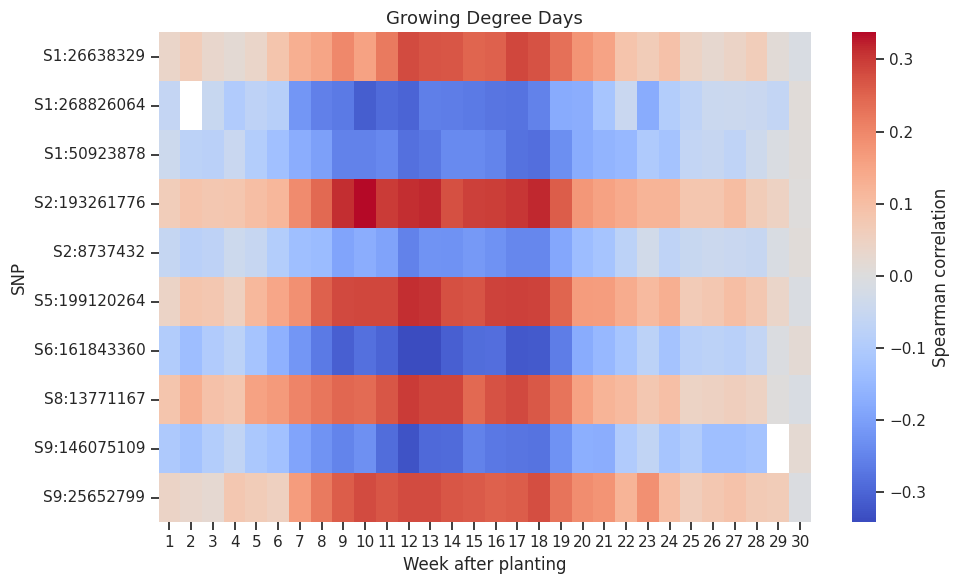

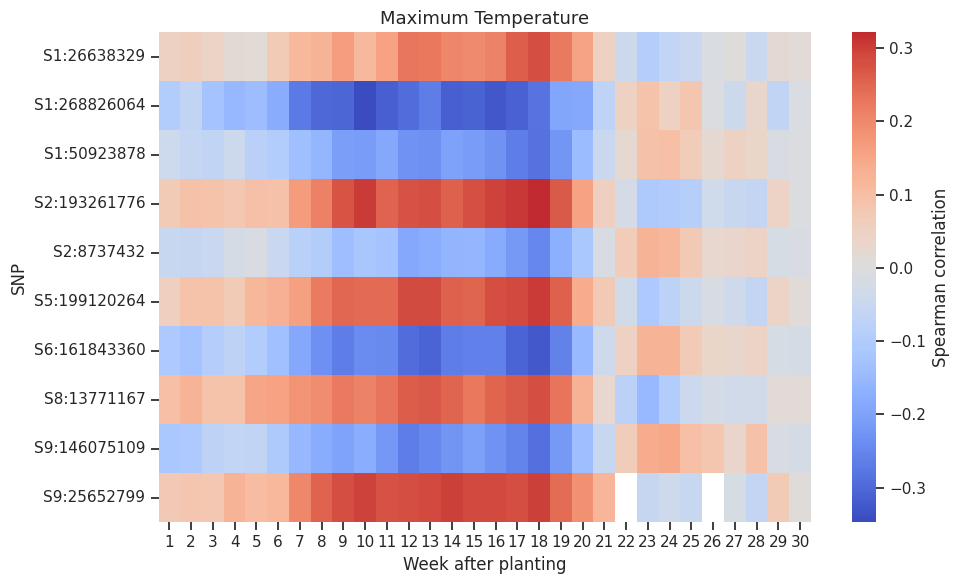

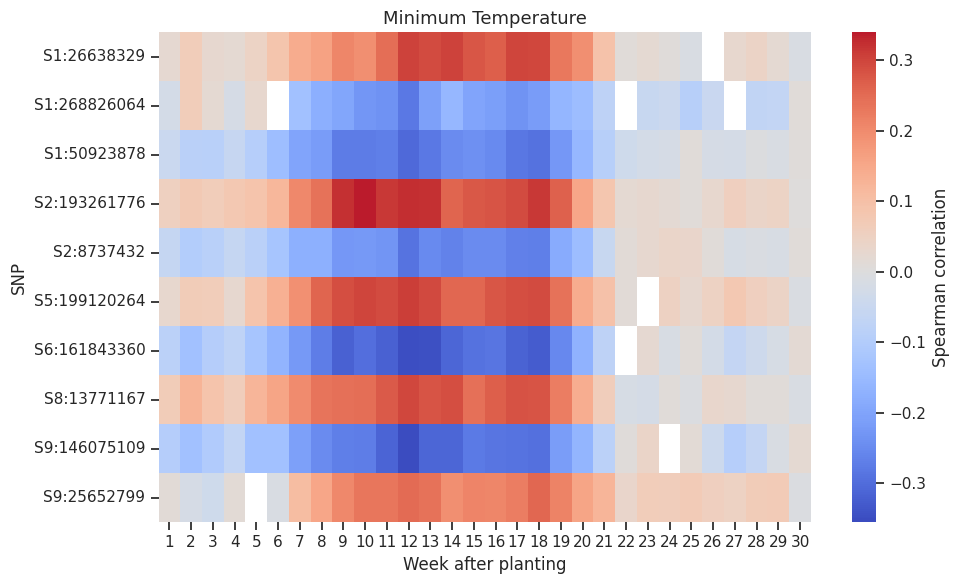

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

sns.set_theme(style="ticks")

# --- Extract Week number as integer ---
df_filtered_2['Week_num'] = (
    df_filtered_2['env_feature']
    .str.extract(r'Week\s*(-?\d+)')[0]
    .astype(float)
)

# --- Keep only positive weeks ---
df_filtered_2 = df_filtered_2[df_filtered_2['Week_num'] > 0]
df_filtered_2['Week_num'] = df_filtered_2['Week_num'].astype(int)

# --- Define variables and readable names ---
var_labels = {
    'T2M_GDD': 'Growing Degree Days',
    'T2M_MAX': 'Maximum Temperature',
    'T2M_MIN': 'Minimum Temperature'
}

# --- Loop through each variable and plot ---
for var, readable_name in var_labels.items():
    df_var = df_filtered_2[df_filtered_2['env_feature'].str.startswith(var)].copy()

    # Pivot: SNP = rows, Week = columns
    df_heat = (
        df_var
        .pivot(index='snp', columns='Week_num', values='spearman_corr')
        .sort_index(axis=0)
        .sort_index(axis=1)
    )

    # Clean SNP labels
    df_heat.index = df_heat.index.str.replace('_', ':')

    # Plot heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_heat, cmap='coolwarm', center=0, annot=False,
                cbar_kws={'label': f'Spearman correlation'})
    plt.title(f"{readable_name}", fontsize=13)
    plt.xlabel("Week after planting")
    plt.ylabel("SNP")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
